In [1]:
#import Biopython
import Bio as Bio

In [2]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [3]:
#import the nucleotide sequences 
t1 = SeqIO.read("A(H3N2).fasta", "fasta")
t2 = SeqIO.read("A(H1N1)pmd09.fasta", "fasta")
t3 = SeqIO.read("A(H1N1).fasta", "fasta")
t4 = SeqIO.read("B.fasta", "fasta")
t5 = SeqIO.read("C.fasta", "fasta")
t6 = SeqIO.read("A&B.fasta", "fasta")

In [4]:
#rename each of the sequences 
t1.id = 'A(H3N2)'
t2.id = 'A(H1N1)pmd09'
t3.id = 'A(H1N1)'
t4.id = 'B'
t5.id = 'C'
t6.id = 'A&B'

In [5]:
print(t3.description)

KP747648.1 Nicotiana benthamiana promoter and 5' UTR-like (H1N1) gene, promoter region


In [6]:
# Combine all of the individual sequences into a new file 
influenza_seq = SeqIO.write([t1,t2,t3,t4,t5,t6], "influenza.fasta", "fasta")

In [7]:
# Load the influenza_seq sequences into MUSCLE 
# https://www.ebi.ac.uk/Tools/msa/muscle/
# Upload the new alignment file to your folder or working directory 

In [8]:
# Open the alignment file as a MultipleSeqAlignment object 
with open("influenza_aln.clw","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [9]:
# Open and initiate the Distance Calculator using the Identity model 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

In [10]:
# Write the Distance Matrix 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

A&B	0
A(H1N1)	0.4934948407357559	0
C	0.45984746523104536	0.4638851502916106	0
A(H3N2)	0.45580978017048	0.4724091520861373	0.3947958725886047	0
A(H1N1)pmd09	0.7972184836249439	0.762673844773441	0.7837595334230597	0.7200538358008075	0
B	0.4751009421265141	0.5154777927321669	0.45984746523104536	0.5123373710183938	0.9600717810677434	0
	A&B	A(H1N1)	C	A(H3N2)	A(H1N1)pmd09	B


In [11]:
# Open and initiate the Tree Constructor 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [12]:
# Build the tree 
influenza_tree = constructor.build_tree(alignment)
influenza_tree.rooted = True
print(influenza_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.020524899057873414, name='Inner3')
            Clade(branch_length=0.1906684611933603, name='C')
            Clade(branch_length=0.031628532974428, name='Inner1')
                Clade(branch_length=0.2677209510991477, name='B')
                Clade(branch_length=0.20737999102736643, name='A&B')
        Clade(branch_length=0.025908479138627233, name='Inner2')
            Clade(branch_length=0.5382832361298042, name='A(H1N1)pmd09')
            Clade(branch_length=0.2243906086436368, name='A(H1N1)')
        Clade(branch_length=0.1889860924181247, name='A(H3N2)')


In [13]:
# Save the tree to a new file 
Phylo.write(influenza_tree, "influenza_tree.xml", "phyloxml")

1

In [16]:
# Import matplotlib
import matplotlib
import matplotlib.pyplot as plt

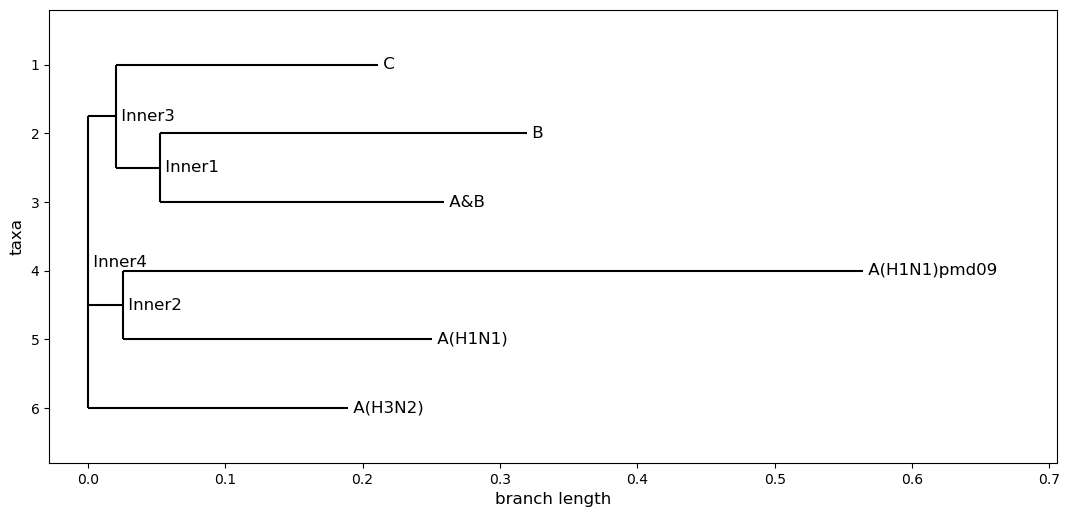

In [15]:
fig = plt.figure(figsize=(13, 6), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(influenza_tree, axes=axes)
fig.savefig("influenza_tree")